In [ ]:
# import thư viện bắt buộc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from copy import deepcopy as copy
from IPython.display import Latex
from IPython.display import Math

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain','capitalLoss','hoursPerWeek','nativeCountry','Output']
df = pd.read_csv(url, names=names)
##import file csv từ 

In [ ]:
df
# xuất file vừa đọc

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape
# kiểm tra kích thước file CSV vừa import

(32561, 15)

In [ ]:
df.columns
# trả về tên các cột trong một bảng(file CSV)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationNum',
       'maritalStatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry',
       'Output'],
      dtype='object')

In [ ]:
df.describe()
# tính toán các thống kê mô tả cho các cột số trong bảng(fileCSV)

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()
#Giá trị null

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
Output           0
dtype: int64

In [ ]:
df = df.dropna(how='any') #để loại bỏ các hàng hoặc cột có giá trị thiếu (NaN)
df # xuất file sau khi sữ lý

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.head()
#hiển thị nội dung của năm dòng đầu tiên trong bẳng(file CSV)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.rename(columns={'Output': 'Income'}, inplace=True) #sử dụng phương thức rename() để đổi tên cột trong dataframe df. Cụ thể, nó đổi tên cột 'Output' thành 'Income'.Đối số inplace=True cho phép thay đổi trực tiếp trên bảng df thay vì tạo ra một bản sao của bảng với tên mới.
df.head(0) #sử dụng để in ra các hàng đầu tiên

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [ ]:
#lọc bỏ các dòng trong bảng(file CSV) mà có giá trị bất kỳ cột nào là " ?" 
df = df[(df.workclass != ' ?' ) & (df.education != ' ?') & (df.maritalStatus != ' ?' ) & (df.occupation != ' ?') & (df.relationship != ' ?') & (df.race != ' ?') & (df.sex != ' ?') & (df.nativeCountry != ' ?')]
df # xuất file sau khi sử lý

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.isnull().sum()
#kiểm tra số lượng các giá trị null. Kết quả trả về là một Series, trong đó tên các cột của bảng là các nhãn và giá trị tương ứng là số lượng giá trị null trong cột đó. Nếu kết quả trả về đều là 0, có nghĩa là không có giá trị rỗng trong bảng

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
capitalLoss      0
hoursPerWeek     0
nativeCountry    0
Income           0
dtype: int64

In [ ]:
df["Income"].unique()
#dùng để lấy ra tất cả các giá trị duy nhất trong cột

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
df.head(0)
# xuất cột dầu tiên

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income


In [ ]:
df.shape
#thống kê mô tả cho các cột số trong bảng(file CSV)

(30162, 15)

In [ ]:
df['Income'].unique
#trả về một mảng chứa tất cả các giá trị duy nhất trong cột "Income" của bảng(file CSV)

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 30162, dtype: object>

In [ ]:
df.info()
#hiển thị thông tin tổng quan về dữ liệu trong DataFrame, bao gồm:
# Số lượng và tên các cột (columns).
# Số lượng các giá trị khác NULL (non-null) trong từng cột.
# Kiểu dữ liệu (data type) của từng cột.
# Tổng số lượng các dòng (rows) trong DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   workclass      30162 non-null  object
 2   fnlwgt         30162 non-null  int64 
 3   education      30162 non-null  object
 4   educationNum   30162 non-null  int64 
 5   maritalStatus  30162 non-null  object
 6   occupation     30162 non-null  object
 7   relationship   30162 non-null  object
 8   race           30162 non-null  object
 9   sex            30162 non-null  object
 10  capitalGain    30162 non-null  int64 
 11  capitalLoss    30162 non-null  int64 
 12  hoursPerWeek   30162 non-null  int64 
 13  nativeCountry  30162 non-null  object
 14  Income         30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
from sklearn import preprocessing # import thư viện module LabelEncoder từ thư viện sklearn để chuyển đổi các giá trị của biến định danh thành các số nguyên.

le = preprocessing.LabelEncoder() #khởi tạo một đối tượng LabelEncoder với tên biến là "le". Để chuyển đổi giá trị của một biến định danh, ta sử dụng phương thức fit_transform() của đối tượng LabelEncoder.

In [ ]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['maritalStatus'] = le.fit_transform(df['maritalStatus'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['nativeCountry'] = le.fit_transform(df['nativeCountry'])
df['Income'] = le.fit_transform(df['Income'])

# mã hoá dạng chuổi sang dạng số

<ipython-input-20-041fc210250a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = le.fit_transform(df['workclass'])
<ipython-input-20-041fc210250a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = le.fit_transform(df['education'])
<ipython-input-20-041fc210250a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
df
#xuất lại bảng (File CSV)

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
df['nativeCountry'].unique()
#Lấy danh sách tất cả các giá trị khác nhau có trong cột 'nativeCountry' của bảng (file CSV)

array([38,  4, 22, 18, 25, 32, 15,  8,  1, 10, 19, 29, 30,  3,  0, 36,  6,
       24, 35, 13, 31,  5,  7,  9, 12, 21,  2, 34, 23, 40, 28, 27, 33, 37,
       11, 26, 39, 16, 20, 17, 14])

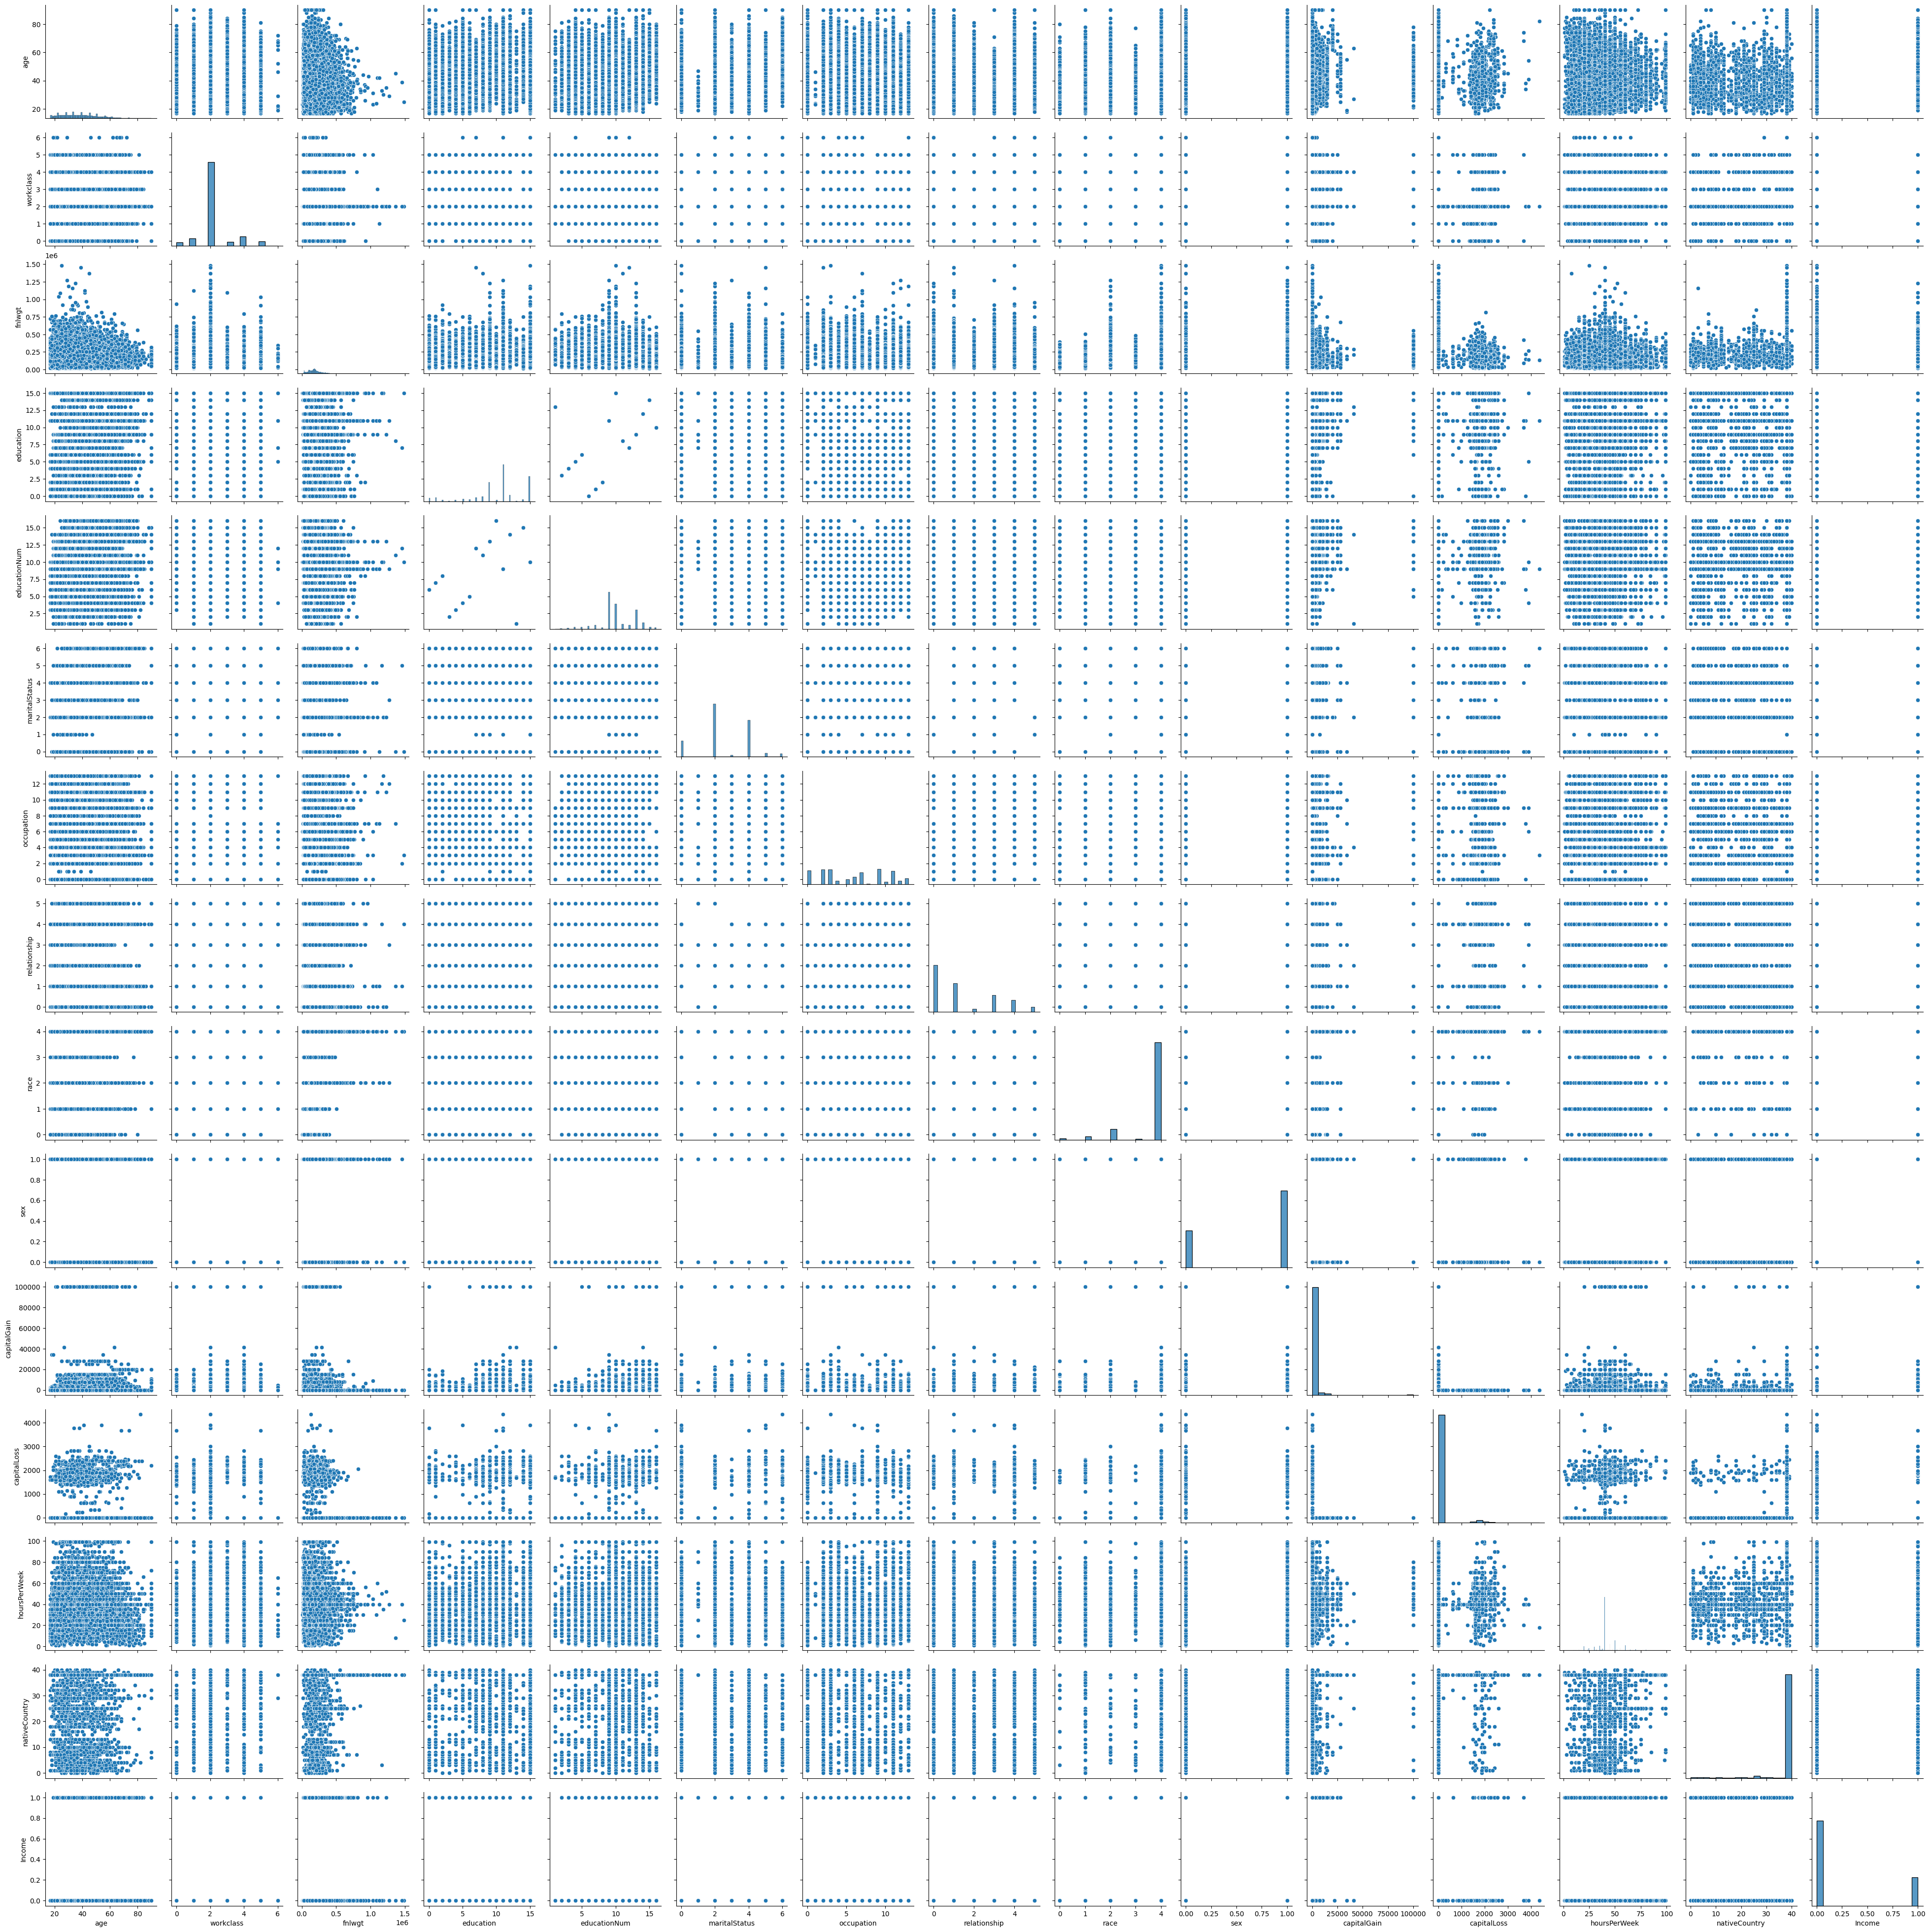

In [ ]:
import seaborn as sns #thư viện Seaborn để vẽ đồ thị phân tán
g = sns.pairplot(df)  #tạo ra một ma trận các đồ thị phân tán, với đường chéo chứa histogram của từng biến
g.fig.set_size_inches(40,40) #thiết lập kích thước của hình ảnh với chiều rộng và chiều cao đều bằng 40 inch

<Figure size 2000x1000 with 0 Axes>

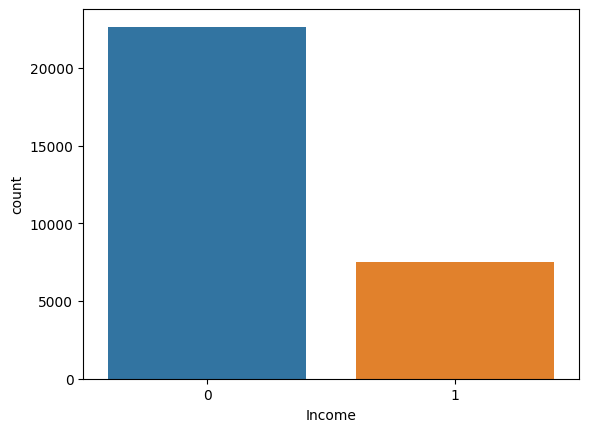

<Figure size 2000x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt # matplotlib để vẽ biểu đồ dạng bar chart (biểu đồ cột)
sns.countplot(x="Income", data=df) #Tạo biểu đồ dạng bar chart bằng cách sử dụng hàm countplot
plt.figure(figsize=(20,10))#Đặt kích thước của figure (khung biểu đồ) là 20x10 

In [ ]:
df.head() #hiển thị 5 dòng đầu tiên của bảng 

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


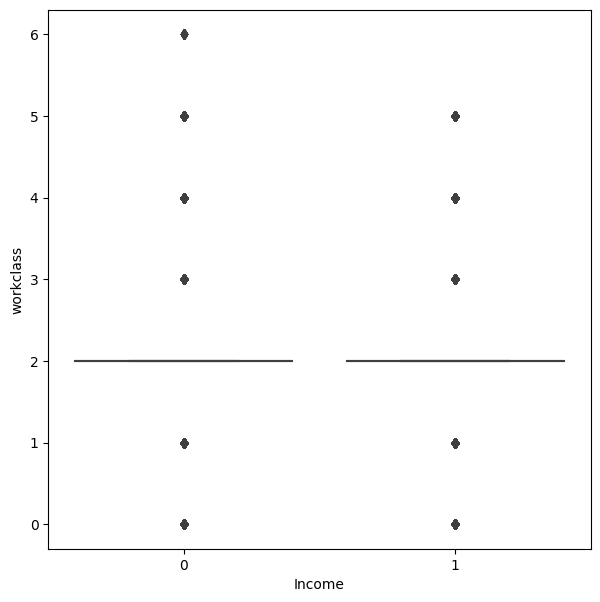

In [ ]:
plt.figure(figsize=(7,7)) #Đặt kích thước của figure
ax = sns.boxplot(y="workclass",x='Income', data=df) #Tạo biểu đồ hộp bằng cách sử dụng hàm boxplot trong mỗi nhóm của biến workclass

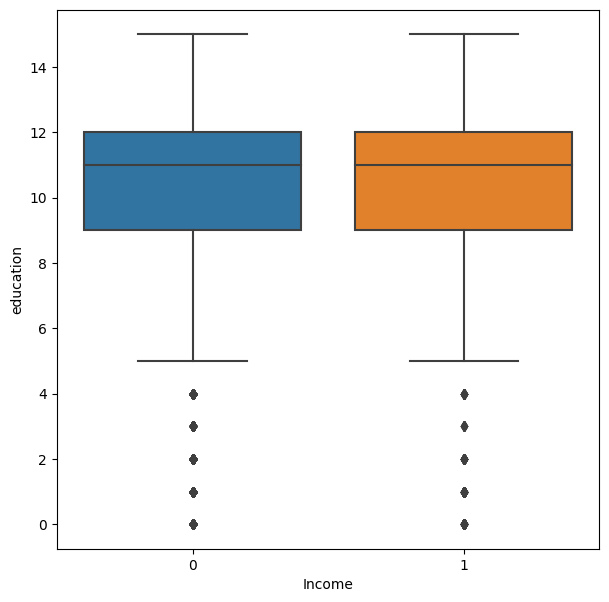

In [ ]:
plt.figure(figsize=(7,7))#Đặt kích thước của figure
ax = sns.boxplot(y="education",x='Income', data=df)#Tạo biểu đồ hộp bằng cách sử dụng hàm boxplot trong mỗi nhóm của biến education

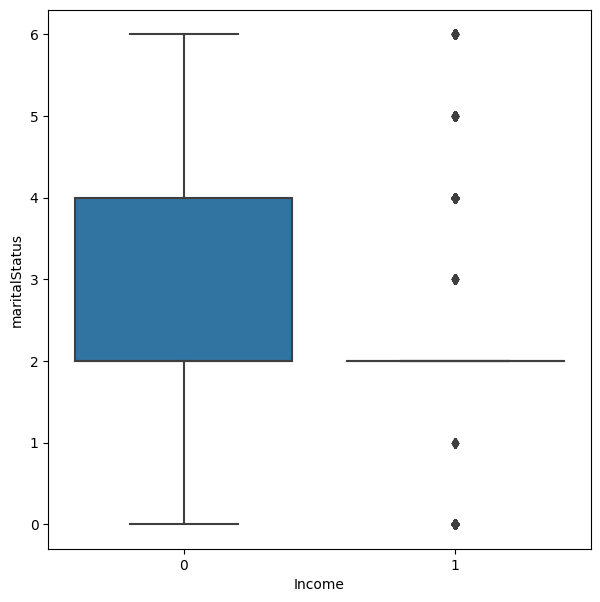

In [ ]:
plt.figure(figsize=(7, 7))#Đặt kích thước của figure
ax = sns.boxplot(y="maritalStatus",x='Income', data=df)#Tạo biểu đồ hộp bằng cách sử dụng hàm boxplot trong mỗi nhóm của biến maritalStatus

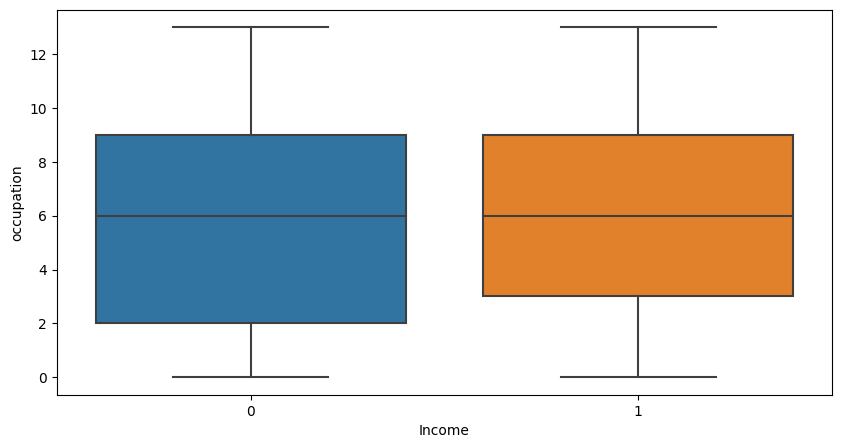

In [ ]:
plt.figure(figsize=(10, 5))#Đặt kích thước của figure
ax = sns.boxplot(y="occupation",x='Income', data=df)#Tạo biểu đồ hộp bằng cách sử dụng hàm boxplot trong mỗi nhóm của biến occupation

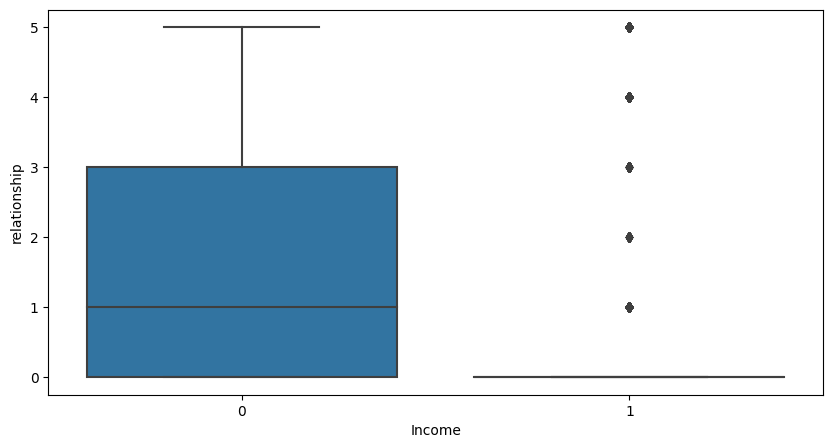

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='Income', data=df)

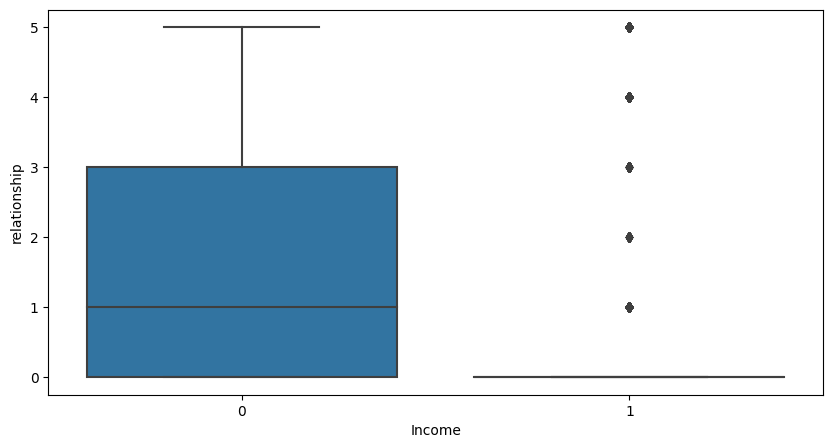

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="relationship",x='Income', data=df)

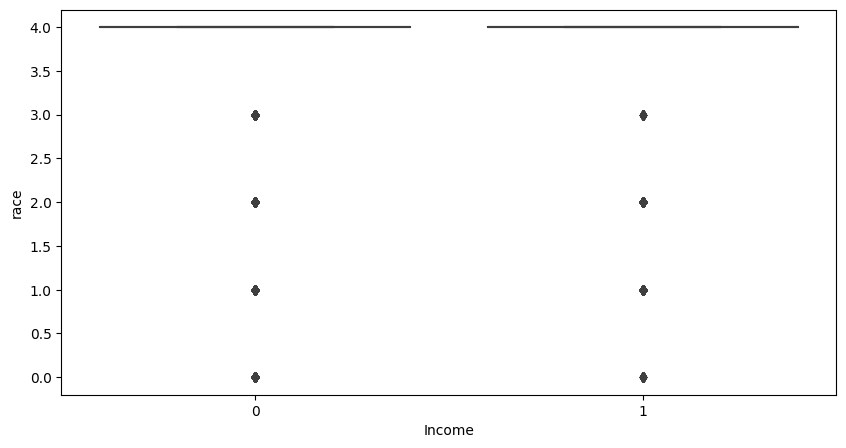

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="race",x='Income', data=df)

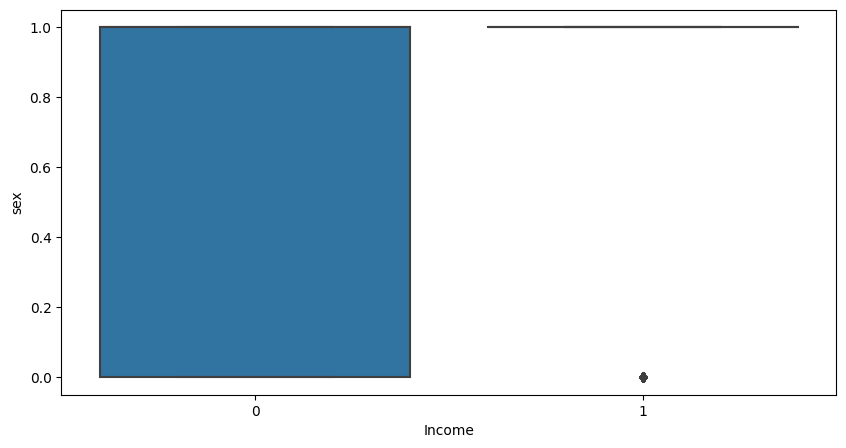

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="sex",x='Income', data=df)

In [ ]:
df.head()#hiển thị 5 dòng đầu tiên của bảng 

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


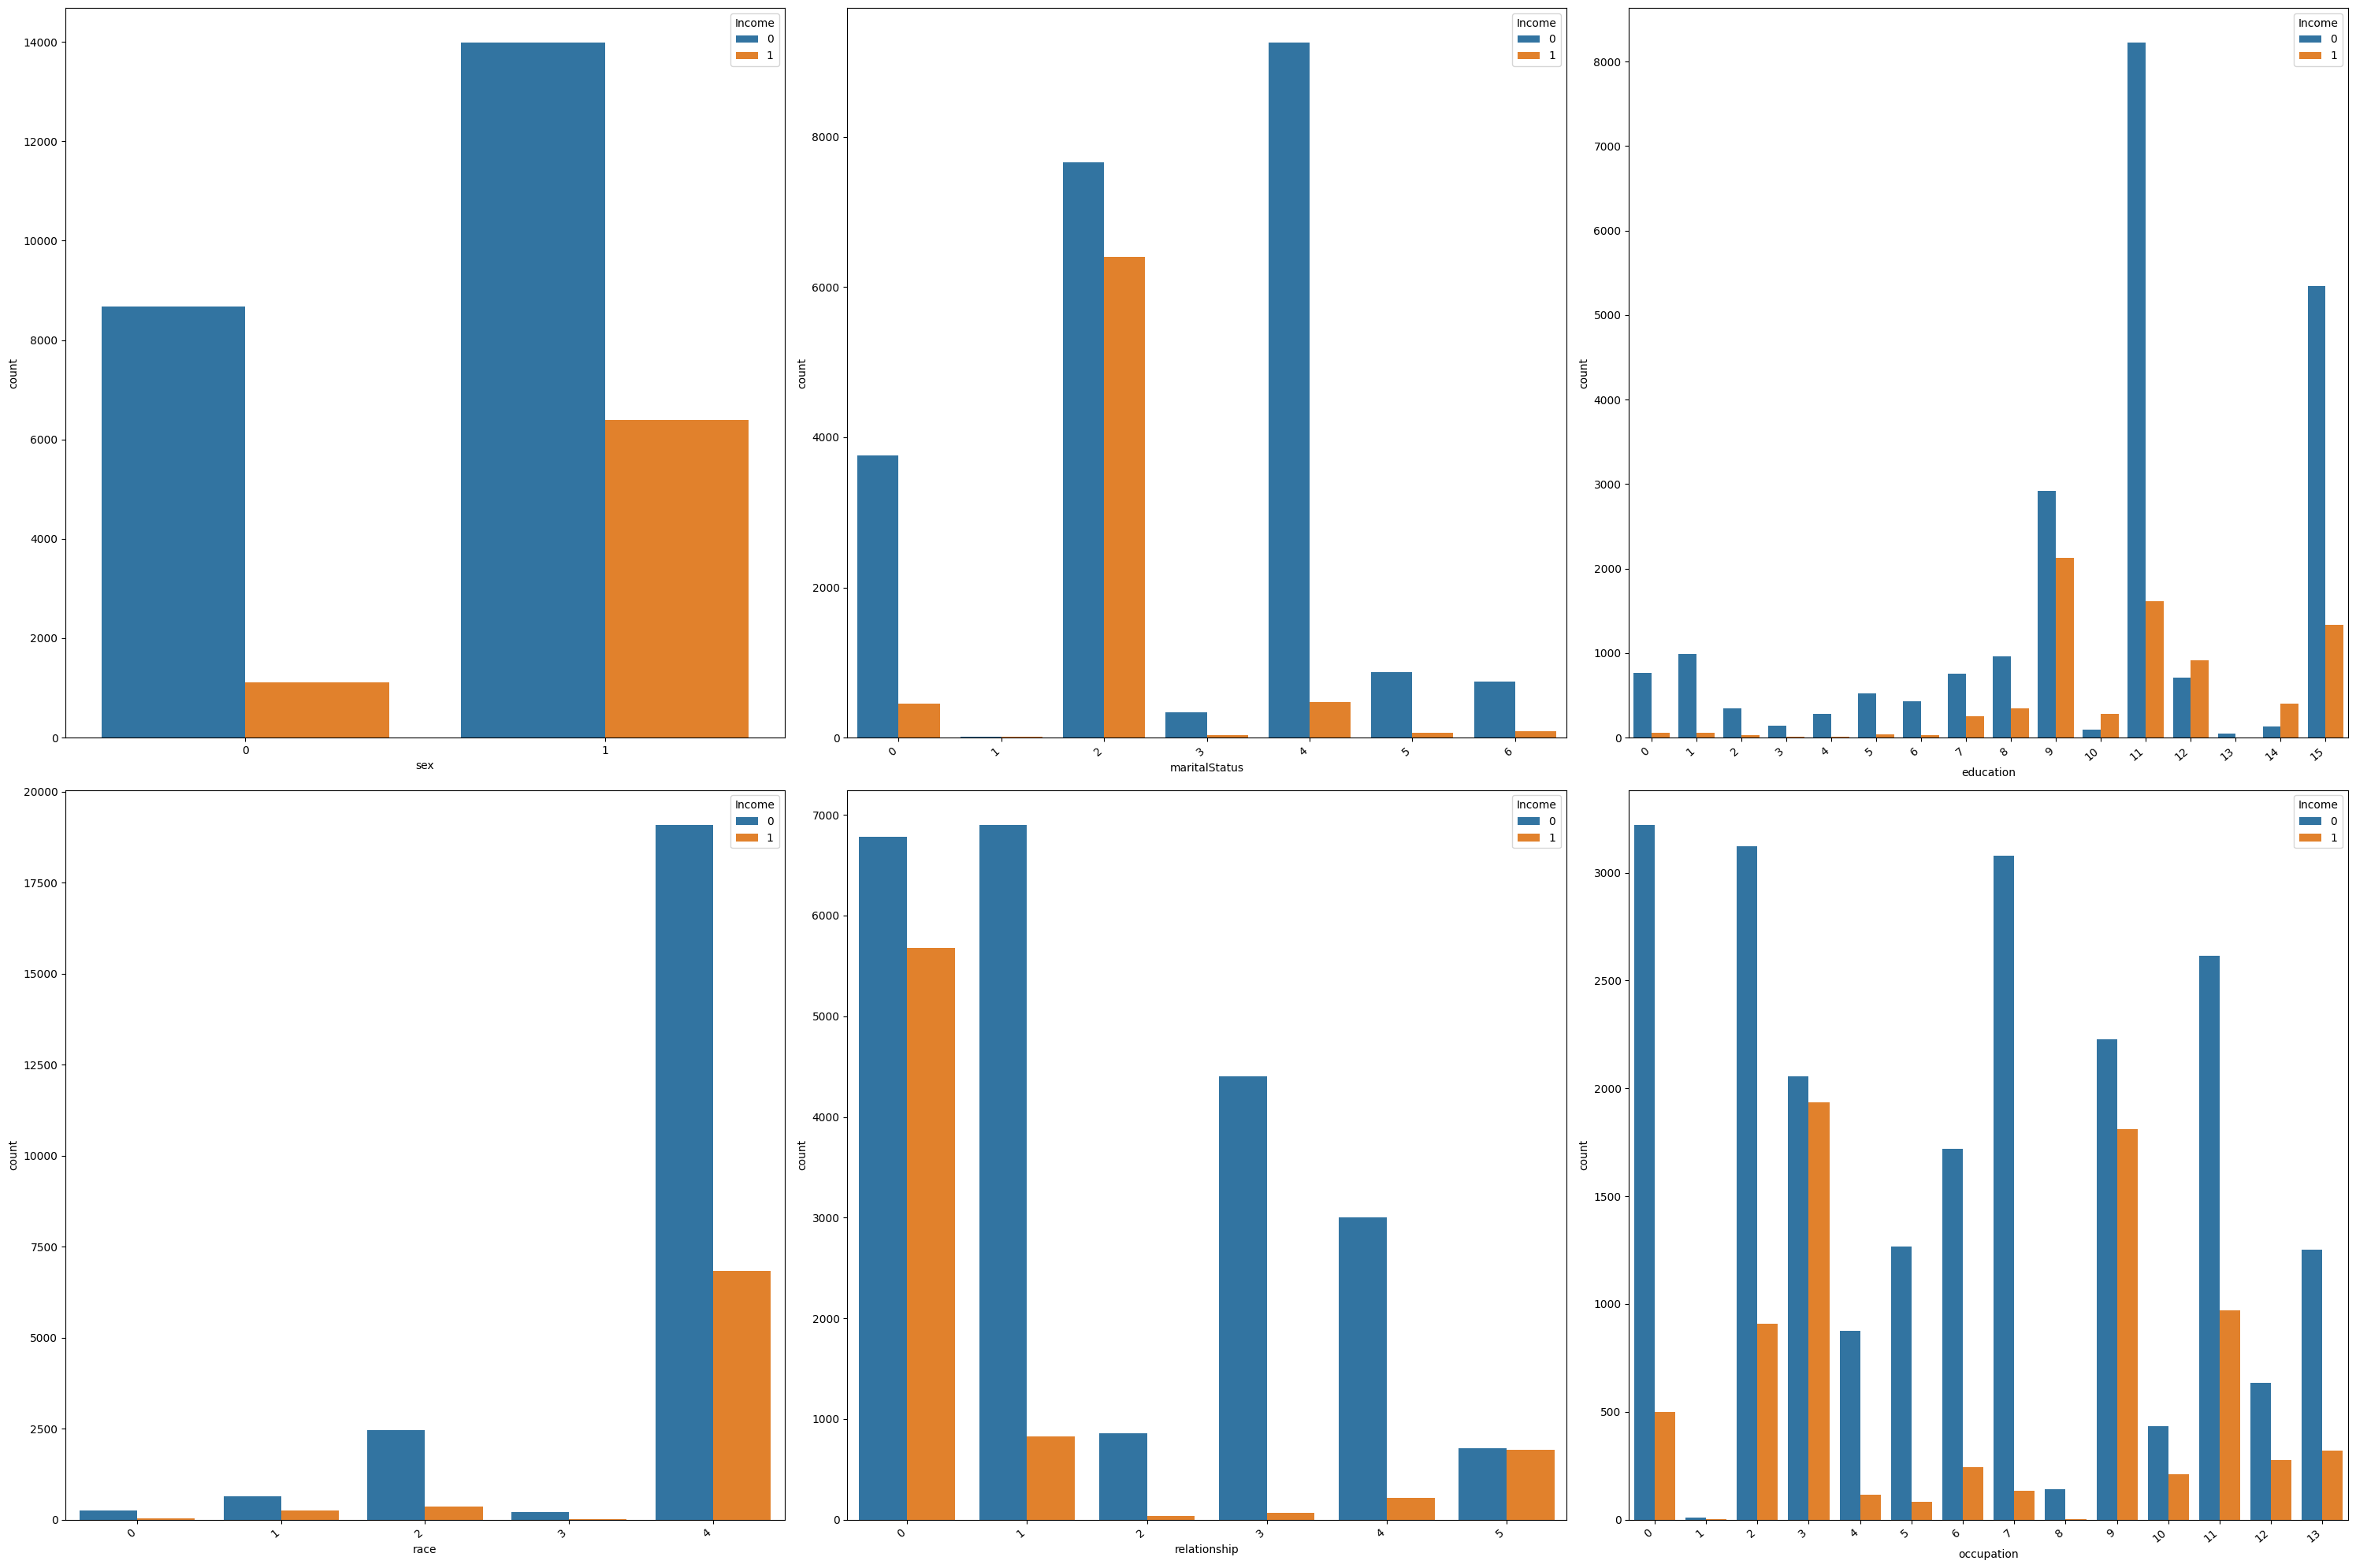

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))#Tạo một lưới biểu đồ có 2 hàng và 3 cột, với tổng cộng 6 ô để vẽ biểu đồ Kích thước của lưới biểu đồ là 30x20 
sns.countplot(x="sex", data=df,hue="Income",ax = ax[0][0])#Vẽ biểu đồ đếm (countplot) cho biến sex, với trục x là sex, trục y là số lượng quan sát
cp = sns.countplot(x="maritalStatus", data=df,hue="Income",ax = ax[0][1])#Vẽ biểu đồ đếm cho biến maritalStatus với các tham số tương tự như biểu đồ đầu tiên, và sẽ được vẽ trong ô thứ hai của hàng đầu tiên, tương ứng với cột thứ hai của lưới biểu đồ
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")#Đặt nhãn cho trục x của biểu đồ cp, với các nhãn được lấy từ các giá trị đang có trong biến maritalStatus
cp2 = sns.countplot(x="education", data=df,hue="Income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=df,hue="Income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=df,hue="Income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=df,hue="Income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

age                 Axes(0.125,0.712609;0.168478x0.167391)
workclass        Axes(0.327174,0.712609;0.168478x0.167391)
fnlwgt           Axes(0.529348,0.712609;0.168478x0.167391)
education        Axes(0.731522,0.712609;0.168478x0.167391)
maritalStatus       Axes(0.125,0.511739;0.168478x0.167391)
occupation       Axes(0.327174,0.511739;0.168478x0.167391)
relationship     Axes(0.529348,0.511739;0.168478x0.167391)
race             Axes(0.731522,0.511739;0.168478x0.167391)
sex                  Axes(0.125,0.31087;0.168478x0.167391)
capitalGain       Axes(0.327174,0.31087;0.168478x0.167391)
capitalLoss       Axes(0.529348,0.31087;0.168478x0.167391)
hoursPerWeek      Axes(0.731522,0.31087;0.168478x0.167391)
nativeCountry           Axes(0.125,0.11;0.168478x0.167391)
dtype: object

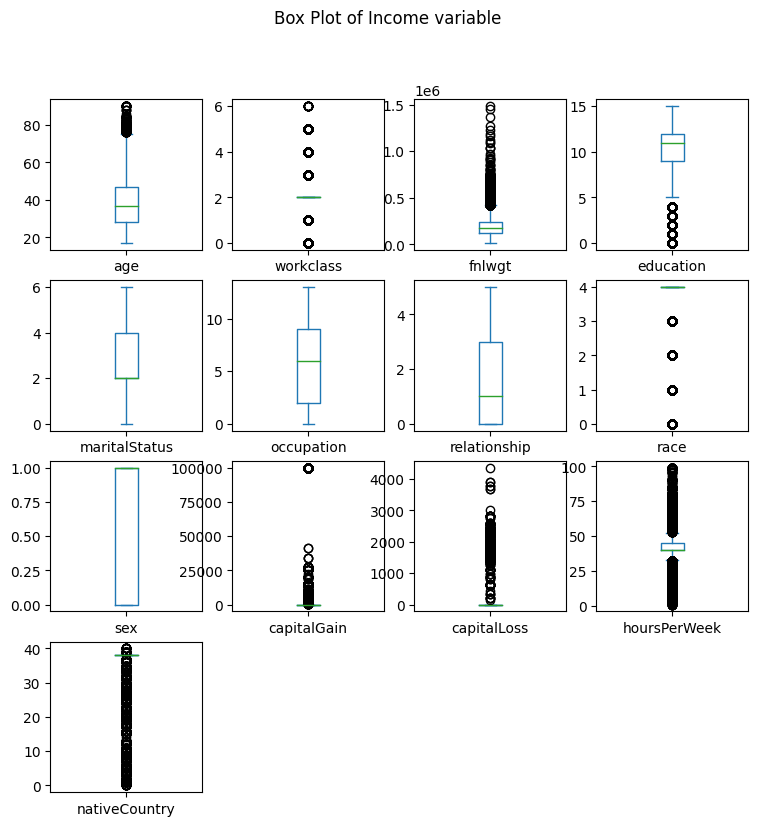

In [ ]:
df.drop(['educationNum','Income'],axis = 1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plot of Income variable')
#tạo ra một biểu đồ boxplot cho các thuộc tính trừ 'educationNum' và 'Income'

<ipython-input-37-9c161e750c1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde = False,bins = 50) #tạo ra biểu đồ histogram cho cột 'age' ham số 'bins=50' sẽ chia dữ liệu thành 50 khoảng và đếm số lượng dữ liệu trong mỗi khoảng để tạo ra đồ thị


<Axes: xlabel='age'>

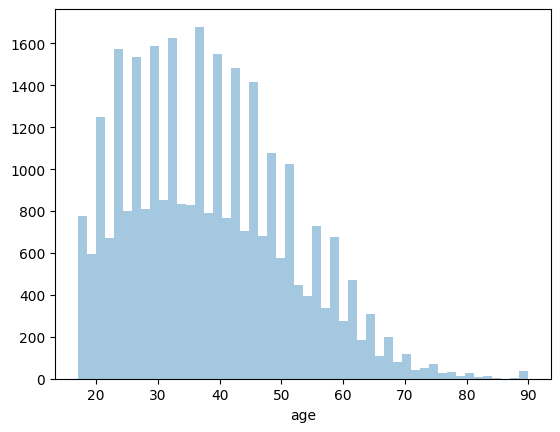

In [ ]:
sns.distplot(df['age'],kde = False,bins = 50) 
#tạo ra biểu đồ histogram cho cột 'age' ham số 'bins=50' sẽ chia dữ liệu thành 50 khoảng và đếm số lượng dữ liệu trong mỗi khoảng để tạo ra đồ thị

<ipython-input-38-cb61d51ea45f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['educationNum'],kde = False)#tạo ra biểu đồ histogram cho cột 'educationNum'


<Axes: xlabel='educationNum'>

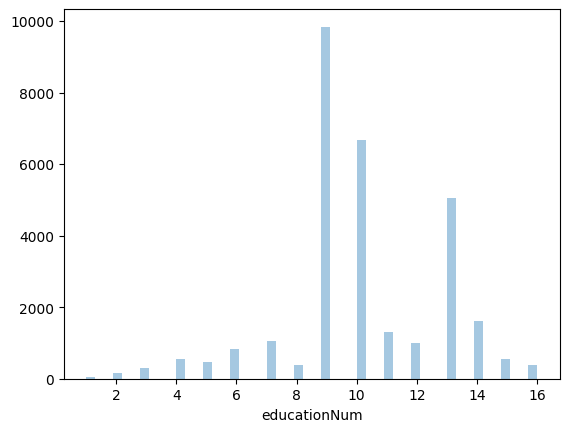

In [ ]:
sns.distplot(df['educationNum'],kde = False)
#tạo ra biểu đồ histogram cho cột 'educationNum'

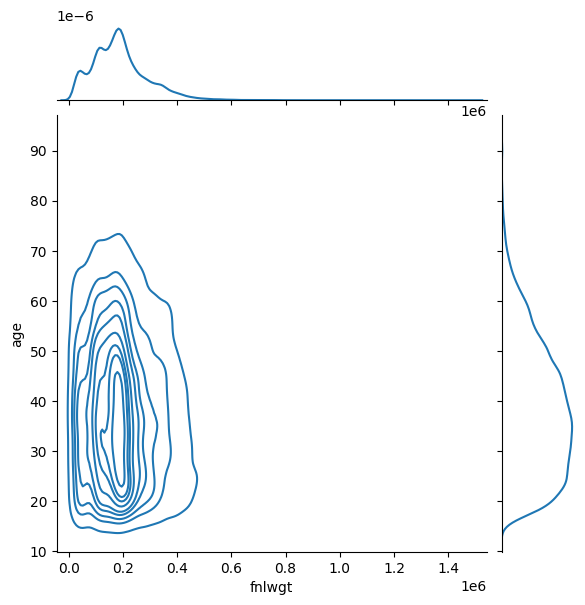

In [ ]:
sns.jointplot(x="fnlwgt", y="age", data=df, kind="kde")
#tạo ra biểu đồ hai chiều (jointplot) cho hai cột 'fnlwgt' và 'age'

<Axes: >

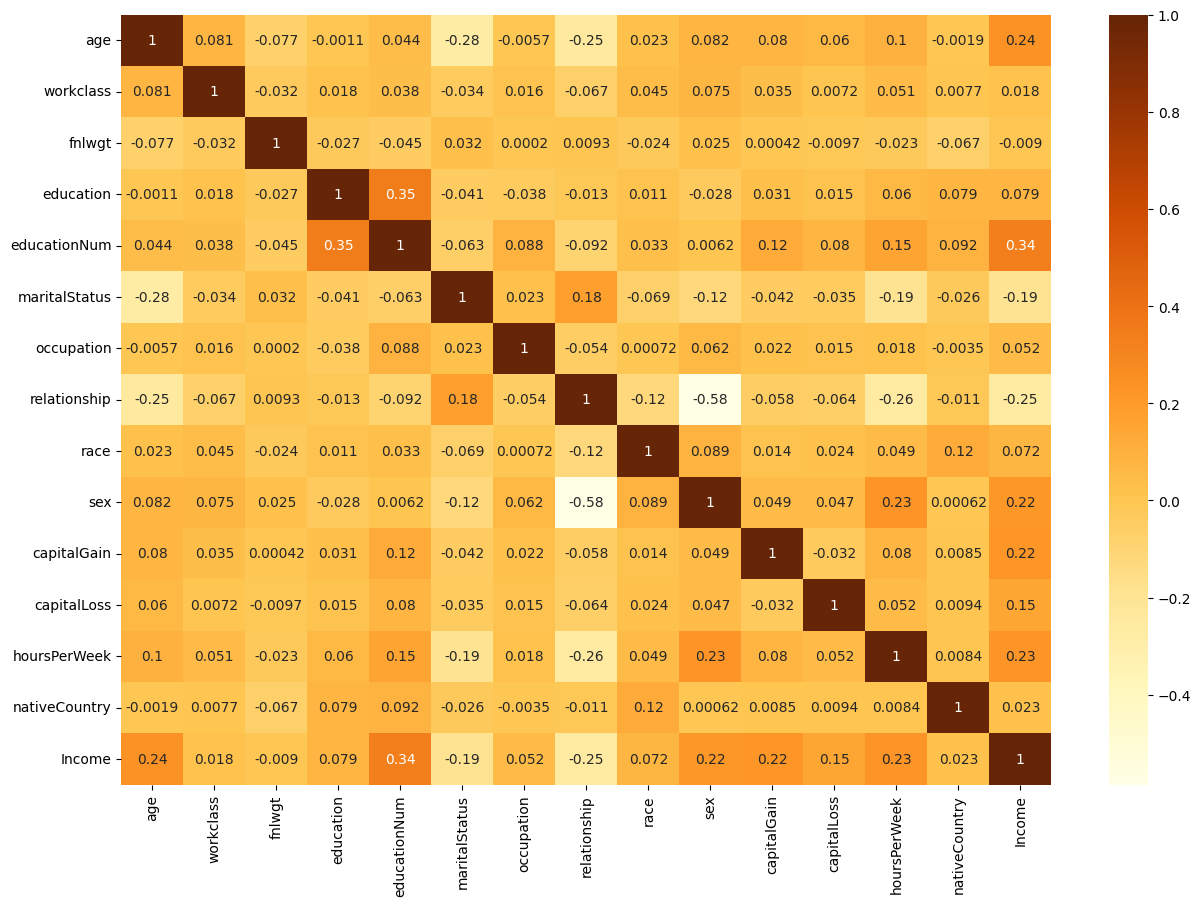

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
#import thư viện Seaborn và matplotlib
plt.figure(figsize=(15,10))#Tham số 'figsize=(15,10)' sẽ đặt kích thước của đồ thị là 15x10
sns.heatmap(df.corr(),annot=True,cmap = 'YlOrBr')
#Tham số 'annot=True' sẽ hiển thị giá trị tương quan trên từng ô trong heatmap. Tham số 'cmap = 'YlOrBr'' sẽ đặt màu sắc cho heatmap là màu vàng cam

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
#Từ ma trận tương quan ở trên, loại bỏ cột không cần thiết có tương quan ít quan trọng nhất với biến mục tiêu 
df1 = df.drop(['fnlwgt','education', 'capitalLoss','nativeCountry'],axis=1) #đặt lại bảng dữ liệu tên df1
df1 # xuất bảng dữ liệu df1

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


In [ ]:
df.head()#hiển thị 5 dòng đầu tiên của bảng 

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,Income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


<Axes: >

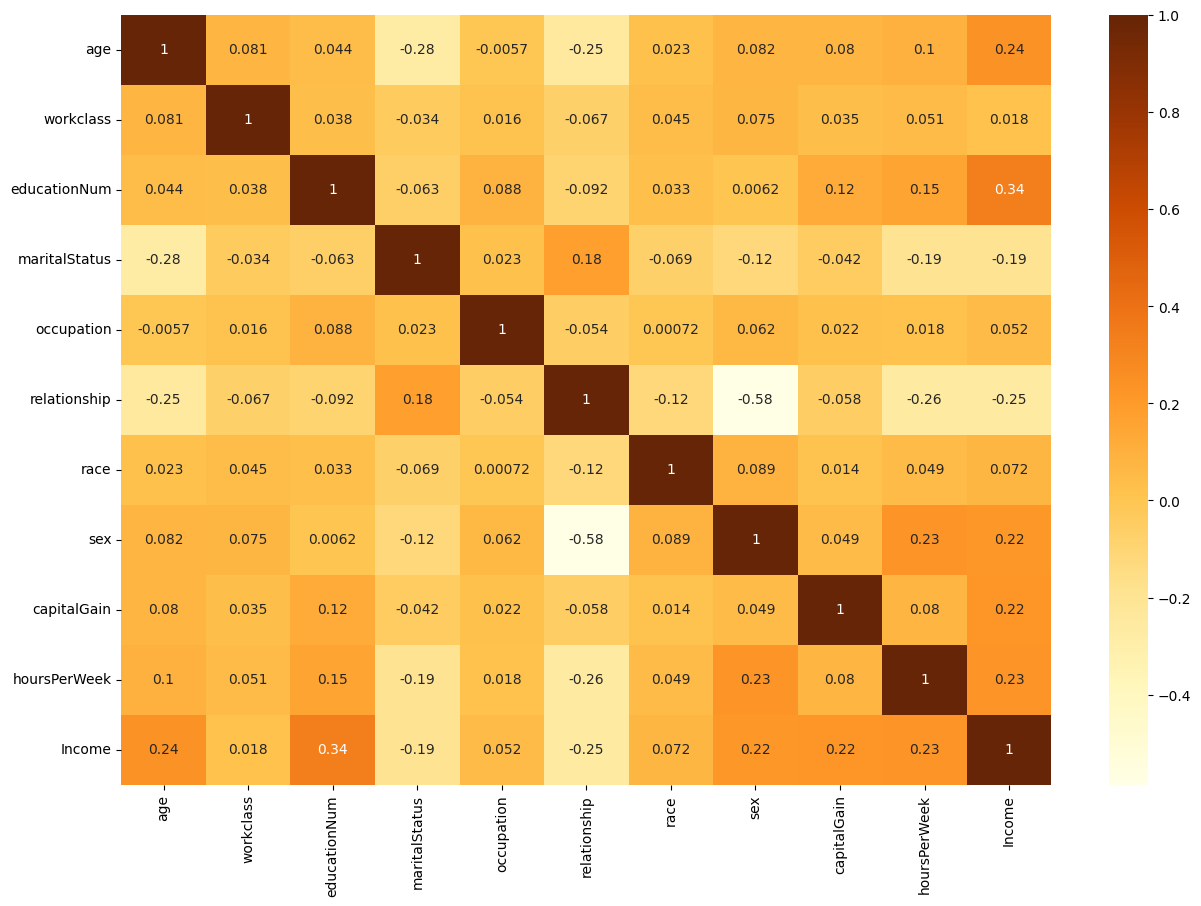

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#import thư viện seaborn và matplotlib
plt.figure(figsize=(15,10))#Tham số 'figsize=(15,10)' sẽ đặt kích thước của đồ thị là 15x10
sns.heatmap(df1.corr(),annot=True,cmap = 'YlOrBr')
#Tham số 'annot=True' sẽ hiển thị giá trị tương quan trên từng ô trong heatmap. Tham số 'cmap = 'YlOrBr'' sẽ đặt màu sắc cho heatmap là màu vàng cam

In [ ]:
df1 #xuất lại bảng 

,age,workclass,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,hoursPerWeek,Income
0,39,5,13,4,0,1,4,1,2174,40,0
1,50,4,13,2,3,0,4,1,0,13,0
2,38,2,9,0,5,1,4,1,0,40,0
3,53,2,7,2,5,0,2,1,0,40,0
4,28,2,13,2,9,5,2,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,12,2,12,5,4,0,0,38,0
32557,40,2,9,2,6,0,4,1,0,40,1
32558,58,2,9,6,0,4,4,0,0,40,0
32559,22,2,9,4,0,3,4,1,0,20,0


**Thuật toán Neural Network**

---
Network 1


In [ ]:
import numpy as np
import pandas as pd
import warnings
#import thư viện numpy,pandas,warnings
warnings.filterwarnings("ignore")
#sử dụng module warnings để tắt các cảnh báo trong quá trình thực thi chương trình

In [ ]:
Y = df1['Income']
df1['Income'].value_counts()
#và lấy cột 'Income' để đặt vào biến Y. 
#Tham số value_counts() sẽ đếm số lượng mẫu có giá trị của cột 'Income' là '1' và '0', và trả về số lần xuất hiện của từng giá trị.

0    22654
1     7508
Name: Income, dtype: int64

In [ ]:
X = df1.drop(['Income'],axis=1)
#lấy tất cả các cột ngoại trừ 'Income' để đặt vào biến X

In [ ]:
# module 'train_test_split' từ thư viện cikit-learn để tách dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
#chỉ định tỷ lệ dữ liệu được sử dụng cho tập kiểm tra. Trong trường hợp này, tập kiểm tra chiếm 30% dữ liệu
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)
#Kết quả trả về là biến X_train chứa tập huấn luyện với số lượng mẫu và số lượng đặc trưng tương ứng đã được in ra
X_train.shape

(21113, 10)

In [ ]:
#kích thước của tập kiểm tra X_test, với số lượng mẫu và số lượng đặc trưng tương ứng
X_test.shape 

(9049, 10)

In [ ]:
#kích thước của tập kiểm tra Y_test, với số lượng mẫu và số lượng đặc trưng tương ứng
Y_test.shape

(9049,)

In [ ]:
#Kết quả trả về là biến Y_train chứa tập huấn luyện với số lượng mẫu và số lượng đặc trưng tương ứng đã được in ra
Y_train.shape

(21113,)

In [ ]:
#hàm reshape của thư viện NumPy để thay đổi kích thước của Y_test thành một ma trận với số dòng tùy ý, và số cột bằng 1(số thuật toán học máy trong scikit-learn.)
Y_test= np.array(Y_test).reshape(-1,1)
#kích thước của tập kiểm tra Y_test, với số lượng mẫu và số lượng đặc trưng tương ứng
Y_test.shape

(9049, 1)

In [ ]:
#hàm reshape của thư viện NumPy để thay đổi kích thước của Y_train thành một ma trận với số dòng tùy ý, và số cột bằng 1(số thuật toán học máy trong scikit-learn.)
Y_train= np.array(Y_train).reshape(-1,1)
#kích thước của tập kiểm tra train, với số lượng mẫu và số lượng đặc trưng tương ứng
Y_train.shape

(21113, 1)

In [ ]:
from keras.layers import InputLayer
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# định nghĩa một mạng neural network sử dụng framework Keras
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

 tạo mô hình theo trình tự và đầu ra của mỗi lớp

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])#cấu hình mô hình mạng nơ-ron.
model.summary()#tóm tắt kiến trúc của mô hình mạng nơ-ron bao gồm số lượng các tầng và các thông số của từng tầng

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)#huấn luyện mô hình trên tập huấn luyện

Epoch 1/10
43/43 [==============================] - 2s 3ms/step - loss: 23.3646 - accuracy: 0.6602
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 7.2093 - accuracy: 0.7042
Epoch 3/10
43/43 [==============================] - 0s 3ms/step - loss: 4.0186 - accuracy: 0.7102
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 3.0626 - accuracy: 0.7171
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 2.6363 - accuracy: 0.7205
Epoch 6/10
43/43 [==============================] - 0s 3ms/step - loss: 2.4319 - accuracy: 0.7233
Epoch 7/10
43/43 [==============================] - 0s 3ms/step - loss: 2.0756 - accuracy: 0.7304
Epoch 8/10
43/43 [==============================] - 0s 3ms/step - loss: 1.7704 - accuracy: 0.7388
Epoch 9/10
43/43 [==============================] - 0s 4ms/step - loss: 1.3888 - accuracy: 0.7426
Epoch 10/10
43/43 [==============================] - 0s 4ms/step - loss: 1.2429 - accuracy: 0.7455


In [ ]:
y_pred = model.predict(X_test)
#dự đoán kết quả trên tập dữ liệu kiểm tra X_test, sau đó kết quả dự đoán được lưu vào biến y_pred
y_pred = (y_pred > 0.30)
#so sánh với ngưỡng 0.3, nếu giá trị dự đoán lớn hơn ngưỡng thì được phân loại là thuộc nhóm 1, ngược lại là thuộc nhóm 0.

283/283 [==============================] - 0s 1ms/step


In [ ]:
#thư viện scikit-learning để tính toán ma trận nhầm lẫn cho kết quả dự đoán so với kết quả kiểm tra thực tế
from sklearn.metrics import confusion_matrix
#ma trận nhầm lẫn sẽ hiển thị số lượng dương tính thật, dương tính giả, âm tính thật và âm tính giả dựa trên kết quả dự đoán (y_pred) và kết quả thử nghiệm thực tế (Y_test).
cm = confusion_matrix(Y_test, y_pred)
cm

array([[3118, 3681],
       [ 566, 1684]])

In [ ]:
#tính điểm F1 bằng cách sử dụng hàm f1_score từ thư viện scikit-learn.
from sklearn.metrics import f1_score
#Điểm F1 là thước đo độ chính xác của mô hình có tính đến cả độ chính xác và khả năng thu hồi.
f1_score(Y_test, y_pred)

0.44228496388706495

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#sử dụng precision_score từ module sklearn.metrics để tính toán giá trị Precision Score của mô hình phân loại
precision_score(Y_test, y_pred)
#Precision Score càng cao thì mô hình có độ chính xác càng cao trong việc dự đoán các điểm Positive

0.3138863000931966

In [ ]:
recall_score(Y_test, y_pred)
#tính toán và trả về giá trị của chỉ số recall score (độ nhạy) của mô hình phân loại dựa trên giá trị thực tế và giá trị dự đoán

0.7484444444444445

** Neural Network**

---


Khai phá tập dữ liệu

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
# Neural network
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
#loss='binary_crossentropy': Là hàm mất mát được sử dụng để đánh giá hiệu suất của mô hình
#optimizer='adam': Là thuật toán tối ưu hóa được sử dụng để tối thiểu hóa hàm mất mát trong quá trình huấn luyệ
#metrics=['accuracy']: Là độ đo để đánh giá hiệu suất của mô hình trong quá trình huấn luyện và kiểm tra
#summary() được sử dụng để in ra tổng quan kiến trúc của mô hình, bao gồm số lượng các lớp,

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=500)
#đưa ra mô hình được xây dựng từ tập dữ liệu huấn luyện, tính toán giá trị loss và accuracy trên tập dữ liệu đó, và cập nhật các trọng số trong mô hình để tối ưu hóa loss

Epoch 1/10
43/43 [==============================] - 1s 2ms/step - loss: 62.8135 - accuracy: 0.3110
Epoch 2/10
43/43 [==============================] - 0s 3ms/step - loss: 47.9902 - accuracy: 0.5023
Epoch 3/10
43/43 [==============================] - 0s 2ms/step - loss: 36.9342 - accuracy: 0.5481
Epoch 4/10
43/43 [==============================] - 0s 3ms/step - loss: 28.9741 - accuracy: 0.6913
Epoch 5/10
43/43 [==============================] - 0s 3ms/step - loss: 20.8891 - accuracy: 0.7321
Epoch 6/10
43/43 [==============================] - 0s 2ms/step - loss: 14.1933 - accuracy: 0.7271
Epoch 7/10
43/43 [==============================] - 0s 2ms/step - loss: 11.1850 - accuracy: 0.7188
Epoch 8/10
43/43 [==============================] - 0s 2ms/step - loss: 8.6973 - accuracy: 0.7210
Epoch 9/10
43/43 [==============================] - 0s 2ms/step - loss: 7.0382 - accuracy: 0.7204
Epoch 10/10
43/43 [==============================] - 0s 2ms/step - loss: 5.5099 - accuracy: 0.7256


In [ ]:
y_pred = model.predict(X_test)#mô hình đã được huấn luyện để dự đoán đầu ra cho tập dữ liệu kiểm tra X_test
y_pred = (y_pred > 0.30)#một ngưỡng xác suất được chọn là 0,3 trả về là một mảng boolean y_pred với giá trị True tương ứng

283/283 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix #tính ma trận nhầm lẫn confusion matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[5150, 1649],
       [1267,  983]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred)
#, f1_score(Y_test, y_pred) tính điểm F1 cho các giá trị dự đoán y_pred và các giá trị mục tiêu thực tế Y_tes

0.40270380991396976

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision_score(Y_test, y_pred)
#precision_score được sử dụng để tính toán độ chính xác, đây là thước đo xem có bao nhiêu dự đoán tích cực là thực sự chính xác

0.37348024316109424

In [ ]:
recall_score(Y_test, y_pred)
#đánh giá hiệu suất của mô hình phân loại nhị phân, việc thu hồi đo lường tỷ lệ các trường hợp dương tính thực tế đã được mô hình xác định chính xác

0.4368888888888889

Cây Quyết định

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Khởi tạo mô hình
model = DecisionTreeClassifier()



In [ ]:
# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)



In [ ]:
# Tính các độ đo chất lượng mô hình
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion matrix:\n", cm)

Accuracy: 0.7968836335506686
F1-score: 0.5865946918578497
Precision: 0.5938069216757741
Recall: 0.5795555555555556
Confusion matrix:
 [[5907  892]
 [ 946 1304]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(Y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7962205768593215
